<p style='text-align:center'><span style='font-family:"Times New Roman"'><span style='color:Black'> <Font size =6>Project : Sexual Assualt trend analysis for Orillia, Hawkesbury and Kenora for the years 2017 - 2021
    

<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5>The data set is obtained from stats canada. <span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5>Below we look at
    
<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5>1) Missing Value
    
<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5>2) Trend Analysis of Actual Inicidents

<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5>3) Trend Analysis of Rate per 100,000 population 
   
<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5>4) Trend Analysis of Founded cases
    
<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5> 5) Rate of sexual assaults for Orillia, Kenora, Hawkesbury and All Ontario
    
<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5> 6) Percentage Unfounded sexual assaults for Orillia, Kenora, Hawkesbury and All Ontario
    

Data Loading and library definition:

In [108]:
#importing librabry

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#read source file

pd.pandas.set_option('display.max_column',None)
data=pd.read_excel(r"C:\Users\sagar\OneDrive\Documents\OPP_Assesment\Sexual_Assault_Data.xlsx")

data["Reference period"]=data["Reference period"].astype(int)

data.head(5)

,Geography,Violation,Reference period,Actual incidents,"Rate per 100,000 population 8",Percentage change in rate 9,Unfounded incidents 10,Percent unfounded 10,Total cleared,Cleared by charge,Cleared otherwise,"Total, persons charged 11","Rate, total persons charged per 100,000 population aged 12 years and over 8","Total, adult charged","Rate, adult charged per 100,000 population aged 18 years and over 8","Total, youth charged 12 13","Rate, youth charged per 100,000 population aged 12 to 17 years 8","Total, youth not charged 12 13","Rate, youth not charged per 100,000 population aged 12 to 17 years 8"
0,Hawkesbury,"Sexual assault, level 3, aggravated [1310]",2017,0,0.0,NaN,0,NaN,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
1,Hawkesbury,"Sexual assault, level 3, aggravated [1310]",2018,0,0.0,NaN,0,NaN,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
2,Hawkesbury,"Sexual assault, level 3, aggravated [1310]",2019,0,0.0,NaN,0,NaN,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
3,Hawkesbury,"Sexual assault, level 3, aggravated [1310]",2020,0,0.0,NaN,0,NaN,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
4,Hawkesbury,"Sexual assault, level 3, aggravated [1310]",2021,0,0.0,NaN,0,NaN,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0


<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5> 1) Finding the missing values in the data set:

In [109]:
features_na=[features for features in data.columns if data[features].isnull().sum()>1]
for features in features_na:
    print(" %missing value in ",features,"= ",data[features].isnull().mean())

 %missing value in  Percentage change in rate 9 =  0.6666666666666666
 %missing value in  Percent unfounded 10 =  0.4888888888888889


.......................



<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5>"Percentage change in rate" and "percentage unfouded" has missing value which constitute 66% and 48% respectevly. Below we are replacing the missing value in the data set with zero, since missing value has no impact on the dependent variable and the trend.
    
.......................
    

In [121]:
for features in features_na:
    data[features]=data[features].fillna(0)
data.head(3)

,Geography,Violation,Reference period,Actual incidents,"Rate per 100,000 population 8",Percentage change in rate 9,Unfounded incidents 10,Percent unfounded 10,Total cleared,Cleared by charge,Cleared otherwise,"Total, persons charged 11","Rate, total persons charged per 100,000 population aged 12 years and over 8","Total, adult charged","Rate, adult charged per 100,000 population aged 18 years and over 8","Total, youth charged 12 13","Rate, youth charged per 100,000 population aged 12 to 17 years 8","Total, youth not charged 12 13","Rate, youth not charged per 100,000 population aged 12 to 17 years 8",tp
0,Hawkesbury,"Sexual assault, level 3, aggravated [1310]",2017,0,0.0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,NaN
1,Hawkesbury,"Sexual assault, level 3, aggravated [1310]",2018,0,0.0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,NaN
2,Hawkesbury,"Sexual assault, level 3, aggravated [1310]",2019,0,0.0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,NaN


........................




<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5> 2 ) Evaluating trend or relationship between Actual Incidents and Reporting year

<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5>Created pivot table based on each location and plotted the relationship between number of actual incidents vs reporting year. The graphs below shows the trend 
    
    
........................

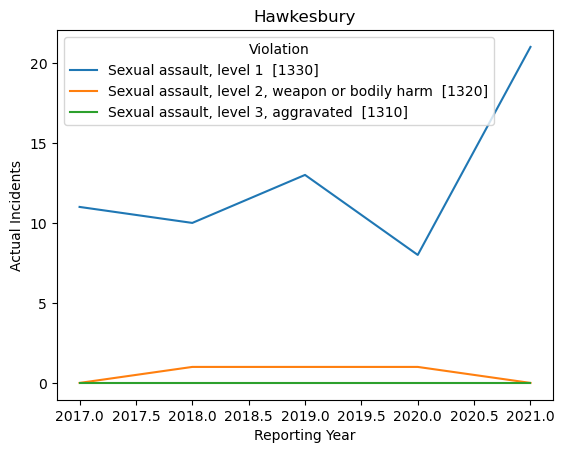

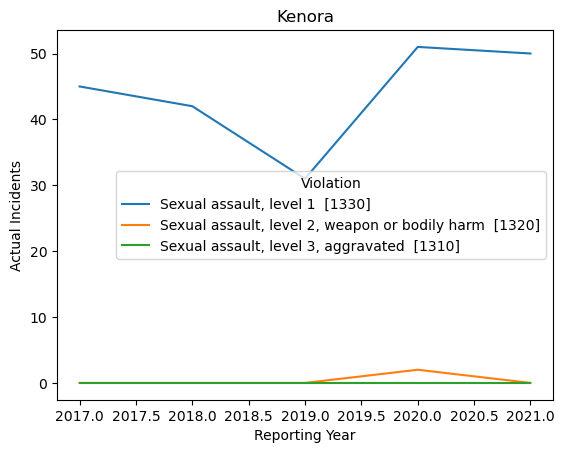

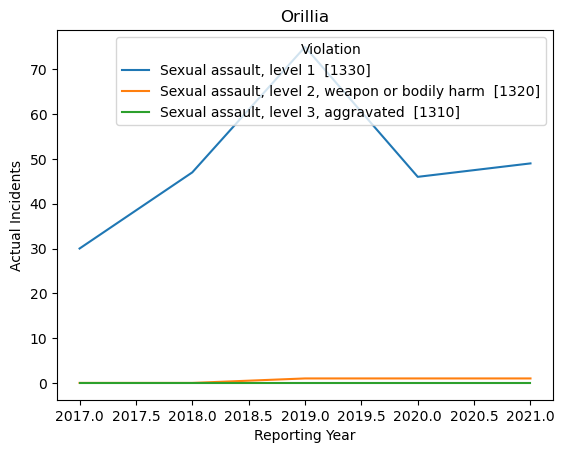

In [90]:
violation_all=data["Violation"].unique()
violation_all

#creared a list of all geographical location:
Geography_all=data["Geography"].unique()
Geography_all

#created pivot table and ploted the table as line graph for each geographical area 

for features in Geography_all:
    data_geo=data[data["Geography"]==features]
    pvt_data=data_geo.pivot_table("Actual incidents",index="Reference period",columns="Violation")
    pvt_data.plot()
    
#reporting period on X axis, Actal Incidents on Y axis

    plt.xlabel("Reporting Year")
    plt.ylabel("Actual Incidents")
    plt.title(features)



........................

<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5>The above plot shows the trend for actual incident numbers associated with sexual assualt(Level 1, level 2, level 3) during the year 2017-2021 for Orillia, Kenora and Hawkesbury. 
    
<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5>But, we should also consider that, the population in corresponding locations also changed during these years. So, rate per 100000 population would be an accurate representation of impact on the population for the respective municipal locations.

    
    
........................


<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5>3) Trend Analysis of Rate per 100,000 population 
   

<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5> The graph below represents the rate per 100,000 population for each municipal locations for the reporting period.
    
........................


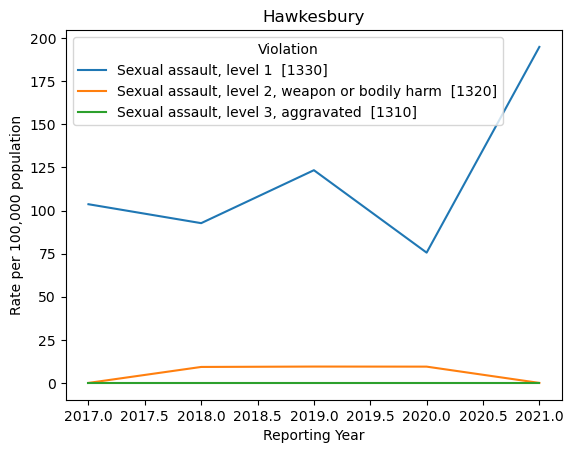

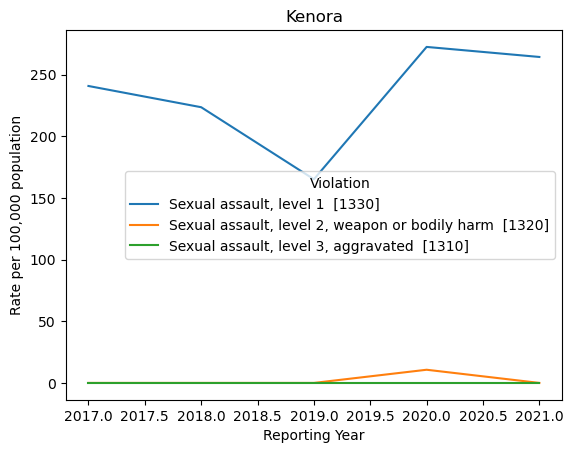

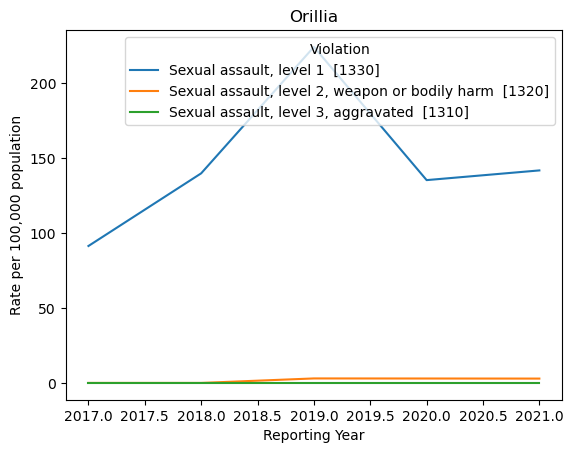

In [120]:
#created pivot table and ploted the table as line graph for each geographical area 

for features in Geography_all:
    data_geo=data[data["Geography"]==features]
    pvt_data=data_geo.pivot_table("Rate per 100,000 population 8",index="Reference period",columns="Violation")
    pvt_data.plot()
    
#reporting period on X axis, Rate per 100,000 population on Y axis

    plt.xlabel("Reporting Year")
    plt.ylabel("Rate per 100,000 population")
    plt.title(features)

........................

<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5>From the plots above for rate per 100,000 population, we can conclude that it exbits a similar trend to the number of incidents, the reason being the population of these municipal location didn't change drastically over the reporting period.

    
........................

<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5> 4) Trend Analysis of unfounded cases
    
<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5> Below graphs look at the relationship between percentage unfounded sexual assaults for each of the municipal location.
    
........................

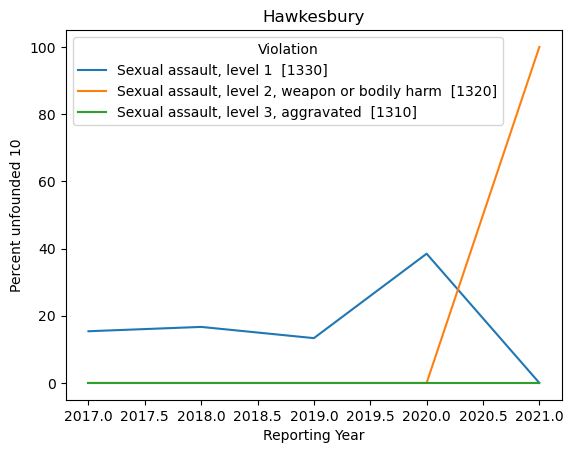

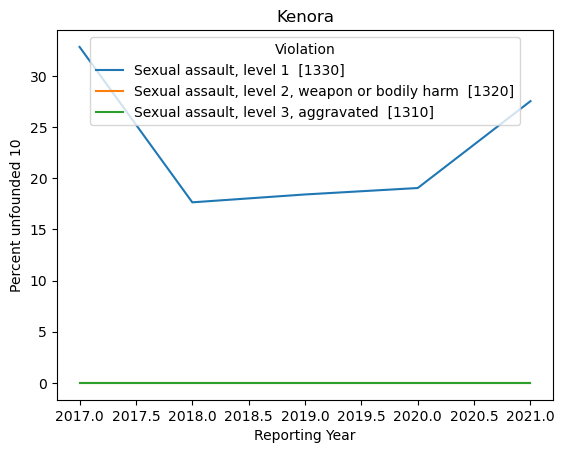

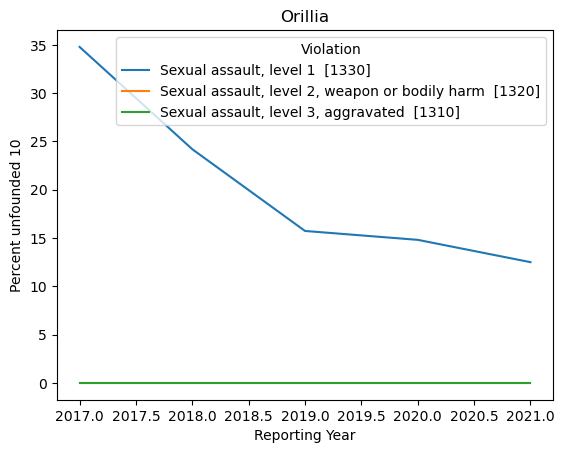

In [134]:
#created pivot table and ploted the table as line graph for each geographical area for features in Geography_all:

    data_geo=data[data["Geography"]==features]
    pvt_data2=data_geo.pivot_table("Percent unfounded 10",index="Reference period",columns="Violation")
    pvt_data2.plot()
    plt.xlabel("Reporting Year")
    plt.ylabel("Percent unfounded 10")
    plt.title(features)

<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5> 5) Rate of sexual assaults for Orillia, Kenora, Hawkesbury and All Ontario
    
<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5> Below graphs look at the relationship between Rate of sexual assaults for each of the municipal location vs All Ontario.
    
........................

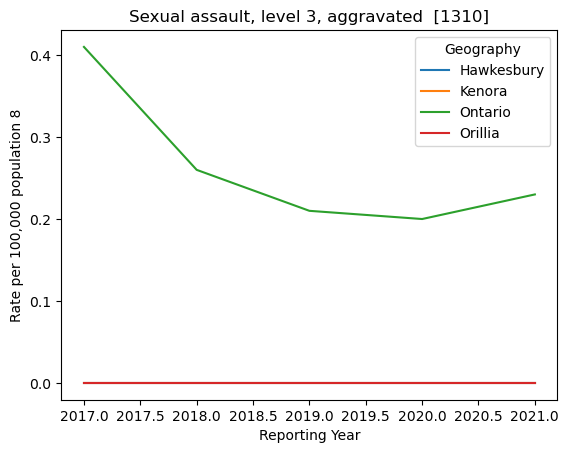

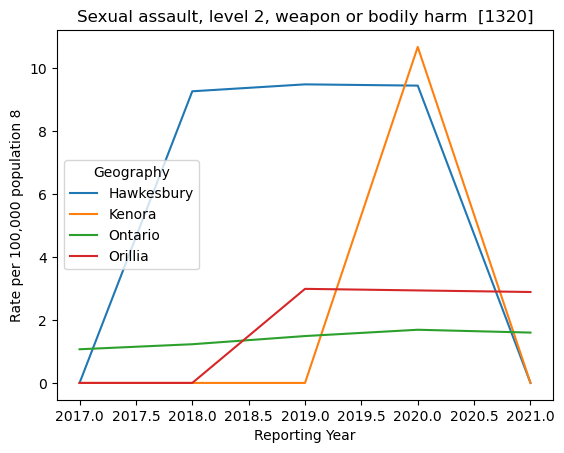

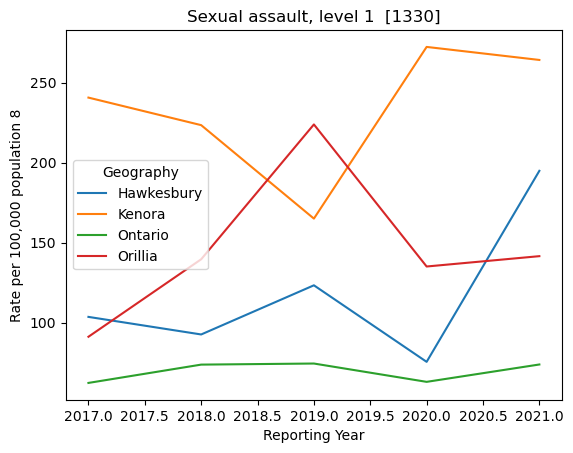

In [131]:

data_all=pd.read_excel(r"C:\Users\sagar\OneDrive\Documents\OPP_Assesment\Sexual_Assault_Data - all.xlsx")

violation_on=data_all["Violation"].unique()
violation_on

#created pivot table and ploted the table as line graph for each Violation
for features in violation_on:
    data_geo=data_all[data_all["Violation"]==features]
    pvt_data=data_geo.pivot_table("Rate per 100,000 population 8",index="Reference period",columns="Geography")
    pvt_data.plot()
    
#reporting period on X axis, Actal Incidents on Y axis

    plt.xlabel("Reporting Year")
    plt.ylabel("Rate per 100,000 population")
    plt.title(features)

<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5> 6) Percentage Unfounded sexual assaults for Orillia, Kenora, Hawkesbury and All Ontario
    
<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5> Below graphs look at the relationship between Percentage Unfounded sexual assaults for each of the municipal location vs All Ontario.
    
........................

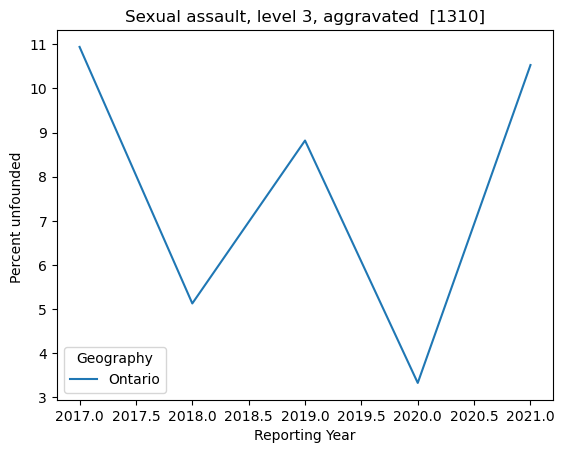

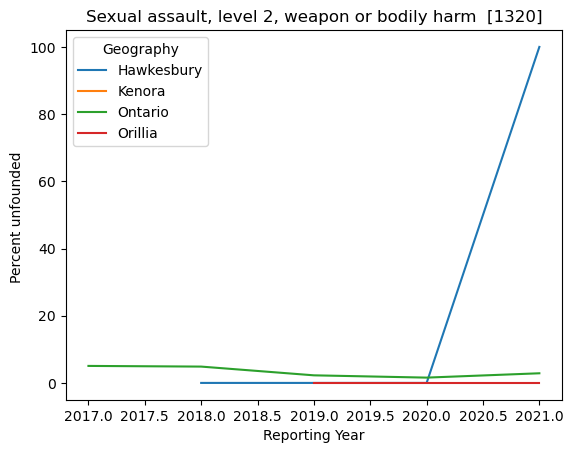

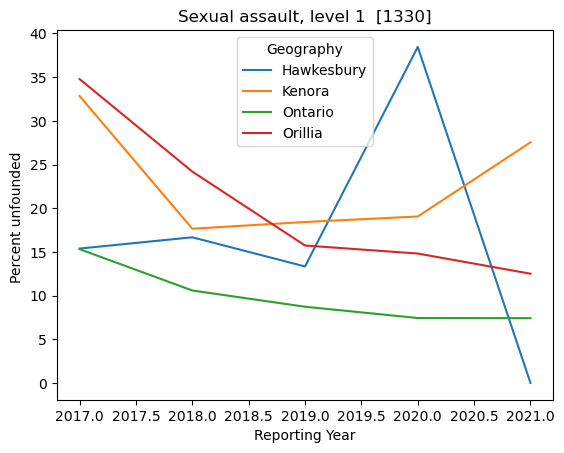

In [132]:
#created pivot table and ploted the table as line graph for each Violation
for features in violation_on:
    data_geo=data_all[data_all["Violation"]==features]
    pvt_data=data_geo.pivot_table("Percent unfounded 10",index="Reference period",columns="Geography")
    pvt_data.plot()
    
#reporting period on X axis, Actal Incidents on Y axis

    plt.xlabel("Reporting Year")
    plt.ylabel("Percent unfounded ")
    plt.title(features)

<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5> Below is  Pivot table for avergae sexual assault incident rates per 100,000 population:

In [145]:
for features in violation_on:
    data_geo=data_all[data_all["Violation"]==features]
    pvt_data=data_geo.pivot_table("Rate per 100,000 population 8",index="Reference period",columns="Geography",aggfunc="mean",margins=True,margins_name='All')
    print(pvt_data)

Geography         Hawkesbury  Kenora  Ontario  Orillia     All
Reference period                                              
2017                     0.0     0.0    0.410      0.0  0.1025
2018                     0.0     0.0    0.260      0.0  0.0650
2019                     0.0     0.0    0.210      0.0  0.0525
2020                     0.0     0.0    0.200      0.0  0.0500
2021                     0.0     0.0    0.230      0.0  0.0575
All                      0.0     0.0    0.262      0.0  0.0655
Geography         Hawkesbury  Kenora  Ontario  Orillia     All
Reference period                                              
2017                   0.000   0.000    1.070    0.000  0.2675
2018                   9.270   0.000    1.230    0.000  2.6250
2019                   9.490   0.000    1.490    2.990  3.4925
2020                   9.450  10.680    1.690    2.940  6.1900
2021                   0.000   0.000    1.600    2.890  1.1225
All                    5.642   2.136    1.416    1.764 

<span style='font-family:"Times New Roman"'><span style='color:Blue'> <Font size =5> Below is pivot table for avergae unfounded sexual assault incident rates :

In [146]:
for features in violation_on:
    data_geo=data_all[data_all["Violation"]==features]
    pvt_data=data_geo.pivot_table("Percent unfounded 10",index="Reference period",columns="Geography",aggfunc="mean",margins=True,margins_name='All')
    print(pvt_data)

Geography         Ontario    All
Reference period                
2017                10.94  10.94
2018                 5.13   5.13
2019                 8.82   8.82
2020                 3.33   3.33
2021                10.53  10.53
All                  7.75   7.75
Geography         Hawkesbury  Kenora  Ontario  Orillia        All
Reference period                                                 
2017                     NaN     NaN    5.060      NaN   5.060000
2018                     0.0     NaN    4.860      NaN   2.430000
2019                     0.0     NaN    2.260      0.0   0.753333
2020                     0.0     0.0    1.580      0.0   0.395000
2021                   100.0     NaN    2.870      0.0  34.290000
All                     25.0     0.0    3.326      0.0   8.971538
Geography         Hawkesbury  Kenora  Ontario  Orillia      All
Reference period                                               
2017                  15.380   32.84    15.31   34.780  24.5775
2018            